# Exemplo de reamostragem das partículas

In [1]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

%matplotlib inline



## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

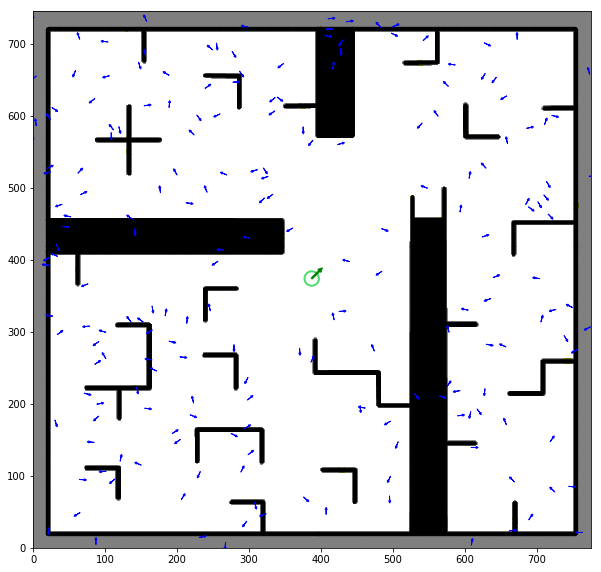

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[165.75175947819574, 302.60452032268654, 3.682789652240328],
 [143.7752608464093, 223.3329091840671, 4.9288939942234355],
 [203.8211165314265, 265.179832590385, 6.172292116353567],
 [335.8295414778961, 606.8052599652074, 3.746621851744734],
 [87.28991060282989, 4.384028089717825, 1.5691426820369898],
 [772.2632953850728, 515.7899843245272, 0.17079494966347142],
 [720.2945292761743, 600.6755625783231, 6.028901497063776],
 [256.84501634549895, 397.96289178651296, 3.7298108147616325],
 [592.961311440121, 466.32018538716045, 1.4077264330751975],
 [65.90259361780203, 490.47922412833714, 0.4562602610822098],
 [416.05534242483475, 664.7461236013742, 1.3811466922018376],
 [483.2198235817344, 722.768249321018, 2.344355068360503],
 [643.5335030439485, 653.6420124613692, 4.044388549083062],
 [705.2907617029525, 313.6326577633433, 1.2928753382118483],
 [688.0070566077529, 473.6164579256698, 5.626145520751912],
 [749.2845804463956, 333.6094380896277, 2.6741320432393025],
 [388.6905877360374, 566.3

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.80000000000000004,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 0.021999999999999999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[165.75175947819574, 302.60452032268654, 3.682789652240328],
 [65.90259361780203, 490.47922412833714, 0.4562602610822098],
 [165.75175947819574, 302.60452032268654, 3.682789652240328],
 [165.75175947819574, 302.60452032268654, 3.682789652240328],
 [165.75175947819574, 302.60452032268654, 3.682789652240328],
 [65.90259361780203, 490.47922412833714, 0.4562602610822098],
 [165.75175947819574, 302.60452032268654, 3.682789652240328],
 [203.8211165314265, 265.179832590385, 6.172292116353567],
 [165.75175947819574, 302.60452032268654, 3.682789652240328],
 [592.961311440121, 466.32018538716045, 1.4077264330751975]]

![](animated.gif)